In [92]:
%pylab inline
import pandas as pd
import seaborn
import plotly.graph_objects as go
from datetime import datetime as dt
from sklearn.linear_model import LinearRegression    
import numpy as np   
import matplotlib.pyplot as plt  
from matplotlib import style
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.dates as mdates
style.use('ggplot')
import math
##import tensorflow
from pandas.plotting import register_matplotlib_converters
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import random as rd


Populating the interactive namespace from numpy and matplotlib


In [173]:
df = pd.read_csv('annual_beef_data.csv')
df.head()


,Year,Consumption,Production,Export,Population,Fuel_Price,Cattle Slaughtered,Beef_Price
0,1961,45340550.43,144539000,74700000,2828481,1.8,640100,40.35
1,1962,47745205.84,125689000,59800000,2835226,1.8,585600,41.56
2,1963,50934601.11,129513000,61700000,2847099,1.8,598900,42.80
3,1964,50009860.48,112798000,52700000,2860976,1.8,488500,44.09
4,1965,49876235.85,112943000,55000000,2874711,1.8,490700,45.41


In [174]:
df.shape

(58, 8)

<function matplotlib.pyplot.show(*args, **kw)>

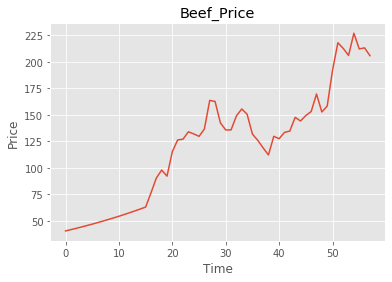

In [175]:
plt.plot(df['Beef_Price'])
plt.title('Beef_Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show

In [214]:
df_Beef_Price = df.filter(['Fuel_Price'])
dataset = df_Beef_Price.values #this converts in array
dataset

array([[  1.8 ],
       [  1.8 ],
       [  1.8 ],
       [  1.8 ],
       [  1.8 ],
       [  1.8 ],
       [  1.8 ],
       [  1.8 ],
       [  1.8 ],
       [  1.8 ],
       [  2.24],
       [  2.48],
       [  3.29],
       [ 11.58],
       [ 11.53],
       [ 12.8 ],
       [ 13.92],
       [ 14.02],
       [ 31.61],
       [ 36.83],
       [ 35.93],
       [ 32.97],
       [ 29.55],
       [ 28.78],
       [ 27.56],
       [ 14.43],
       [ 18.44],
       [ 14.92],
       [ 18.23],
       [ 23.73],
       [ 20.  ],
       [ 19.32],
       [ 16.97],
       [ 15.82],
       [ 17.02],
       [ 20.67],
       [ 19.09],
       [ 12.72],
       [ 17.97],
       [ 28.5 ],
       [ 24.44],
       [ 25.02],
       [ 28.83],
       [ 38.27],
       [ 54.52],
       [ 65.14],
       [ 72.39],
       [ 97.26],
       [ 61.67],
       [ 79.5 ],
       [111.26],
       [111.67],
       [108.66],
       [ 98.95],
       [ 54.4 ],
       [ 46.  ],
       [ 55.71],
       [ 71.64]])

In [215]:
training_data_len = math.ceil(len(dataset)*.80)
training_data_len

47

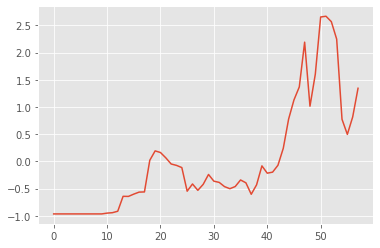

In [216]:
processed_data = preprocessing.scale(dataset)
plt.plot(processed_data)
plt.show()

In [217]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.00400473],
       [0.00618913],
       [0.01356148],
       [0.08901429],
       [0.08855921],
       [0.10011832],
       [0.11031219],
       [0.11122235],
       [0.27132065],
       [0.31883135],
       [0.31063985],
       [0.28369892],
       [0.25257122],
       [0.24556294],
       [0.23445891],
       [0.11495404],
       [0.15145172],
       [0.11941385],
       [0.14954037],
       [0.19959953],
       [0.16565031],
       [0.15946118],
       [0.13807227],
       [0.12760535],
       [0.13852735],
       [0.17174843],
       [0.1573678 ],
       [0.09939019],
       [0.14717393],
       [0.24301447],
       [0.20606171],
       [0.21134068],
       [0.24601802],
       [0.33193774],
       [0.47983981],
       [0.5764995 ],
       [0.64248658],
       [0.868

In [218]:
train_dataset = processed_data[:training_data_len]
train_dataset

array([[-0.96393268],
       [-0.96393268],
       [-0.96393268],
       [-0.96393268],
       [-0.96393268],
       [-0.96393268],
       [-0.96393268],
       [-0.96393268],
       [-0.96393268],
       [-0.96393268],
       [-0.94939264],
       [-0.94146171],
       [-0.91469483],
       [-0.64074731],
       [-0.64239958],
       [-0.60043175],
       [-0.56342075],
       [-0.56011619],
       [ 0.02115484],
       [ 0.19365256],
       [ 0.16391157],
       [ 0.06609678],
       [-0.04691897],
       [-0.07236403],
       [-0.11267959],
       [-0.54656752],
       [-0.41405491],
       [-0.53037521],
       [-0.42099447],
       [-0.23924401],
       [-0.36250387],
       [-0.38497483],
       [-0.46263185],
       [-0.50063422],
       [-0.46097957],
       [-0.34036336],
       [-0.39257531],
       [-0.60307539],
       [-0.42958631],
       [-0.08161678],
       [-0.21578167],
       [-0.19661526],
       [-0.07071176],
       [ 0.24123813],
       [ 0.77822815],
       [ 1

In [242]:
length = 45
x_train = []
y_train = []
for i in range(length,len(train_dataset)):
    x_train.append(train_dataset[i-length:i])
    y_train.append(train_dataset[i])


In [243]:
x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [244]:
from keras.models import Sequential
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences =False))
model.add(Dense(25))
model.add(Dense(1))


In [249]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [250]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

Epoch 1/1
2/2 [==============================] - 1s 532ms/step - loss: 1.0908


In [251]:
test_data = scaled_data[training_data_len-length:]
x_test = []
y_test = dataset[training_data_len:]
for i in range(length,len(test_data)):
    x_test.append(test_data[i-length:i,0])

In [252]:
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [253]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [254]:
rm = []
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rm.append(rmse)
rm

[85.28601759412071]

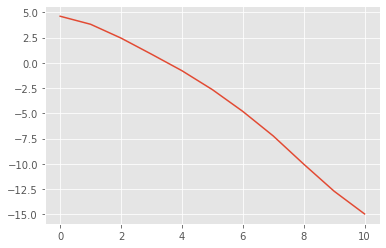

In [255]:
plt.plot(predictions)
plt.show()

/Users/enakshi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



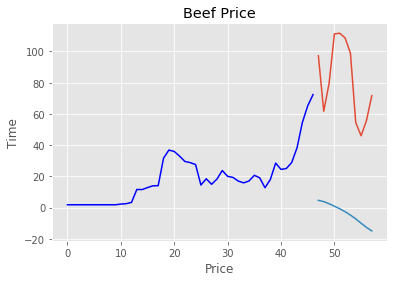

In [256]:
train = df_Beef_Price[:training_data_len]
valid = df_Beef_Price[training_data_len:]
valid['Predictions'] = predictions
plt.plot(train['Fuel_Price'],color = 'b')
plt.plot(valid[['Fuel_Price','Predictions']])
plt.xlabel('Price')
plt.ylabel('Time')
plt.title('Beef Price')
plt.show()

In [ ]:
df_forecast = web.DataReader('ETH-USD',data_source = 'yahoo', start='2012-01-01',end='2020-03-09')
df_forecast_close = df_forecast.filter(['Close'])
last_85_days = df_forecast_close[-85:].values
scaled = scaler.transform(last_85_days)
x_test = []
x_test.append(scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)